In [ ]:
from sklearn.neural_network import MLPRegressor
import nltk
!pip install tensorflow==2.15.0 keras==2.15.0 tensorflow-addons==0.23.0
import tensorflow as tf
from sklearn.preprocessing import StandardScaler
import keras
from keras.layers import Dense
from tensorflow_addons.optimizers import AdamW
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as mpl
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
!pip install category_encoders scikit_optimize
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.base import clone
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import StratifiedKFold, cross_validate
from sklearn.metrics import accuracy_score,confusion_matrix,ConfusionMatrixDisplay, precision_score, recall_score, f1_score, roc_auc_score, roc_curve, auc, precision_recall_curve
import xgboost as xgb
seed = 0
tf.random.set_seed(seed)
train = pd.read_csv('/content/drive/MyDrive/IDS_dataset/train.csv')     #URN-IDD Dataset
test = pd.read_csv('/content/drive/MyDrive/IDS_dataset/test.csv')
val = pd.read_csv('/content/drive/MyDrive/IDS_dataset/val.csv')

  Using cached tensorflow-2.15.0-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (4.4 kB)
Using cached tensorflow-2.15.0-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (475.3 MB)
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow-decision-forests 1.11.0 requires tensorflow==2.18.0, but you have tensorflow 2.15.0 which is incompatible.
tf-keras 2.18.0 requires tensorflow<2.19,>=2.18, but you have tensorflow 2.15.0 which is incompatible.
tensorflow-text 2.18.1 requires tensorflow<2.19,>=2.18.0, but you have tensorflow 2.15.0 which is incompatible.


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/IDS_dataset/test.csv')

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/IDS_dataset/test.csv')

In [ ]:
df


,Switch ID,Port Number,Received Packets,Received Bytes,Sent Bytes,Sent Packets,Port alive Duration (S),Delta Received Packets,Delta Received Bytes,Delta Sent Bytes,...,Connection Point,Total Load/Rate,Total Load/Latest,Unknown Load/Rate,Unknown Load/Latest,Latest bytes counter,Active Flow Entries,Packets Looked Up,Packets Matched,Label
0,of:0000000000000004,Port#:2,117,15705,15537,113,126,2,278,348,...,3,0,0,0,0,0,6,2350,2265,TCP-SYN
1,of:000000000000000a,Port#:4,349224,14743367,38139845,156153,1430,4,556,560,...,4,0,0,0,0,0,4,649491,649367,Normal
2,of:000000000000000a,Port#:2,127,8855,6316408,271,96,0,0,280,...,2,0,0,0,0,0,6,3933,3848,TCP-SYN
3,of:0000000000000005,Port#:3,1396,25241475,31751210,2853,2172,178,4992757,7565,...,1,0,0,0,0,0,8,10237,10113,Blackhole
4,of:000000000000000a,Port#:1,12,1016,13549,101,101,0,0,556,...,2,0,0,0,0,0,10,6269,6181,TCP-SYN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
556,of:000000000000000c,Port#:1,2314,31679329,6456143,1448,1431,2,278,280,...,5,0,0,0,0,0,8,9372,9162,Diversion
557,of:0000000000000008,Port#:2,5923,101167794,19135198,2378,2116,4,556,556,...,2,0,0,0,0,0,8,17193,17055,Blackhole
558,of:0000000000000001,Port#:1,472,12623572,24419,235,136,2,278,278,...,2,0,0,0,0,0,5,1706,1596,TCP-SYN
559,of:0000000000000005,Port#:3,253,26245,18904,147,156,6,640,640,...,2,0,0,0,0,0,6,5780,5668,TCP-SYN


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 561 entries, 0 to 560
Data columns (total 22 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   Switch ID                      561 non-null    object
 1   Port Number                    561 non-null    object
 2   Received Packets               561 non-null    int64 
 3   Received Bytes                 561 non-null    int64 
 4   Sent Bytes                     561 non-null    int64 
 5   Sent Packets                   561 non-null    int64 
 6   Port alive Duration (S)        561 non-null    int64 
 7   Delta Received Packets         561 non-null    int64 
 8   Delta Received Bytes           561 non-null    int64 
 9   Delta Sent Bytes               561 non-null    int64 
 10  Delta Sent Packets             561 non-null    int64 
 11  Delta Port alive Duration (S)  561 non-null    int64 
 12  Connection Point               561 non-null    int64 
 13  Total

In [ ]:
df['Label'].unique()
df['Label'].value_counts()

,count
Label,
TCP-SYN,156
PortScan,127
Blackhole,122
Diversion,90
Normal,49
Overflow,17


<Axes: xlabel='Label'>

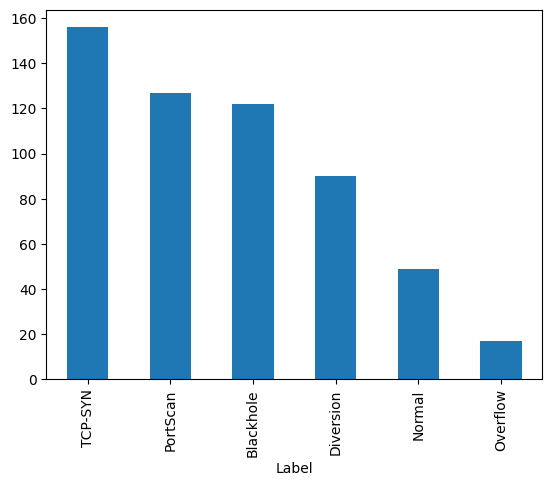

In [ ]:
df['Label'].value_counts().plot(kind='bar')

In [ ]:
X_train=train.drop('Label',axis=1)
y_train=train['Label']
X_test=test.drop('Label', axis=1)
y_test=test['Label']
X_val=val.drop('Label',axis=1)
y_val=val['Label']
X_train

,Switch ID,Port Number,Received Packets,Received Bytes,Sent Bytes,Sent Packets,Port alive Duration (S),Delta Received Packets,Delta Received Bytes,Delta Sent Bytes,...,Delta Port alive Duration (S),Connection Point,Total Load/Rate,Total Load/Latest,Unknown Load/Rate,Unknown Load/Latest,Latest bytes counter,Active Flow Entries,Packets Looked Up,Packets Matched
0,of:0000000000000004,Port#:1,240,16586,12622603,467,126,0,0,280,...,5,1,0,0,0,0,0,4,819,757
1,of:0000000000000004,Port#:2,158,20530,35464,376,171,4,556,3407,...,5,2,0,0,0,0,0,5,1018,918
2,of:0000000000000008,Port#:3,1930,37881404,67857371,414333,1297,0,0,556,...,5,2,0,0,0,0,0,8,987400,987276
3,of:0000000000000001,Port#:4,903,18946410,17900326,98088,176,3,320,270280,...,4,3,0,0,0,0,0,8,195879,195780
4,of:000000000000000b,Port#:1,423,29020,19138042,1562,1451,0,0,560,...,5,1,0,0,0,0,0,4,4524,4411
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2614,of:0000000000000008,Port#:1,646,18927937,26139,253,151,2,278,278,...,5,4,0,0,0,0,0,6,1563,1469
2615,of:000000000000000b,Port#:2,3149,25488846,31784484,3205,2326,4,556,556,...,5,3,0,0,0,0,0,4,14774,14647
2616,of:000000000000000c,Port#:3,386,6324623,13285,97,101,27,526635,556,...,4,2,0,0,0,0,0,8,2688,2590
2617,of:000000000000000c,Port#:2,807,12638724,25268608,1238,366,47,3379,3939658,...,5,2,630355,6303550,630355,6303550,630355,6,3088,2976


In [ ]:
X_train_numeric = pd.get_dummies(X_train, drop_first=True)
X_val_numeric = pd.get_dummies(X_val, drop_first=True)
X_test_numeric = pd.get_dummies(X_test, drop_first=True)
X_train_numeric

,Received Packets,Received Bytes,Sent Bytes,Sent Packets,Port alive Duration (S),Delta Received Packets,Delta Received Bytes,Delta Sent Bytes,Delta Sent Packets,Delta Port alive Duration (S),...,Switch ID_of:0000000000000006,Switch ID_of:0000000000000007,Switch ID_of:0000000000000008,Switch ID_of:0000000000000009,Switch ID_of:000000000000000a,Switch ID_of:000000000000000b,Switch ID_of:000000000000000c,Port Number_Port#:2,Port Number_Port#:3,Port Number_Port#:4
0,240,16586,12622603,467,126,0,0,280,2,5,...,False,False,False,False,False,False,False,False,False,False
1,158,20530,35464,376,171,4,556,3407,43,5,...,False,False,False,False,False,False,False,True,False,False
2,1930,37881404,67857371,414333,1297,0,0,556,4,5,...,False,False,True,False,False,False,False,False,True,False
3,903,18946410,17900326,98088,176,3,320,270280,5002,4,...,False,False,False,False,False,False,False,False,False,True
4,423,29020,19138042,1562,1451,0,0,560,4,5,...,False,False,False,False,False,True,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2614,646,18927937,26139,253,151,2,278,278,2,5,...,False,False,True,False,False,False,False,False,False,False
2615,3149,25488846,31784484,3205,2326,4,556,556,4,5,...,False,False,False,False,False,True,False,True,False,False
2616,386,6324623,13285,97,101,27,526635,556,4,4,...,False,False,False,False,False,False,True,False,True,False
2617,807,12638724,25268608,1238,366,47,3379,3939658,105,5,...,False,False,False,False,False,False,True,True,False,False


In [ ]:
X_train_numeric.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2619 entries, 0 to 2618
Data columns (total 33 columns):
 #   Column                         Non-Null Count  Dtype
---  ------                         --------------  -----
 0   Received Packets               2619 non-null   int64
 1   Received Bytes                 2619 non-null   int64
 2   Sent Bytes                     2619 non-null   int64
 3   Sent Packets                   2619 non-null   int64
 4   Port alive Duration (S)        2619 non-null   int64
 5   Delta Received Packets         2619 non-null   int64
 6   Delta Received Bytes           2619 non-null   int64
 7   Delta Sent Bytes               2619 non-null   int64
 8   Delta Sent Packets             2619 non-null   int64
 9   Delta Port alive Duration (S)  2619 non-null   int64
 10  Connection Point               2619 non-null   int64
 11  Total Load/Rate                2619 non-null   int64
 12  Total Load/Latest              2619 non-null   int64
 13  Unknown Load/Rate 

Initial Xgboost Classifier Method

In [ ]:
from sklearn.utils import class_weight
scaler = StandardScaler()

X_train_numeric = scaler.fit_transform(X_train_numeric)
X_val_numeric = scaler.transform(X_val_numeric)
X_test_numeric = scaler.transform(X_test_numeric)

X_train_ts= tf.convert_to_tensor(X_train_numeric, dtype=np.float32)
X_val_ts=tf.convert_to_tensor(X_val_numeric,dtype=np.float32)
X_test_ts= tf.convert_to_tensor(X_test_numeric,dtype=np.float32)


label_encoder =LabelEncoder()
y_train_enc =label_encoder.fit_transform(y_train)
y_val_enc =label_encoder.transform(y_val)
y_test_enc = label_encoder.transform(y_test)

#model = xgb.XGBClassifier(booster='gbtree', n_estimators=100, max_depth=5, learning_rate=0.9, use_label_encoder=False,colsample_bytree='0.5', eval_metric='mlogloss',random_state=48,metrics='auc')
#model.fit(X_train_numeric,y_train_enc,eval_set=[(X_val_numeric,y_val_enc)],verbose=False)

def Build_model(X_train, y_train,X_val,  y_val,X_test, y_test, optimizer,
                n_of_hidden_layers,n_neurons=64,  activation='relu',
                epochs= 100,batch_size= 64, early_stopping=True, class_weights=None ):

    model = tf.keras.models.Sequential()
    model.add(tf.keras.Input(shape=(X_train.shape[1], )))

    for _ in range(n_of_hidden_layers):
        model.add(keras.layers.Dense(n_neurons, activation=activation))

    model.add(keras.layers.Dense(len(np.unique(y_train)),activation='softmax'))

    model.compile(optimizer=optimizer,
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy' ] )

    es = tf.keras.callbacks.EarlyStopping(monitor="val_loss", patience=5, restore_best_weights=True)

    history = model.fit(
        X_train, y_train,
        validation_data=(X_val, y_val),
        epochs=epochs,
        batch_size=batch_size,
        callbacks=[es] if early_stopping else None,
        class_weight=class_weights,
        verbose=0
    )

    train_eval = model.evaluate(X_train, y_train, verbose=0)
    val_eval = model.evaluate(X_val, y_val, verbose=0)
    test_eval = model.evaluate(X_test, y_test, verbose=0)
    return model, history, train_eval, val_eval, test_eval


optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)
mlp_model, history, train_eval, val_eval, test_eval = Build_model(
    X_train_numeric, y_train_enc,
    X_val_numeric, y_val_enc,
    X_test_numeric, y_test_enc,
    optimizer=optimizer,
    n_of_hidden_layers=2,
    n_neurons=64,
    epochs=100,
    batch_size=64,
    early_stopping=True,



)

# 4. Predictions
y_pred = mlp_model.predict(X_test_ts)
y_pred_classes = np.argmax(y_pred, axis=1)

# 5. Evaluation Metrics
print("Classification Report (MLP Model):")
print(classification_report(y_test_enc, y_pred_classes, target_names=label_encoder.classes_))







#y_pred = model.predict(X_test_numeric)
#Build_model.


#y_prob = model.predict_proba(X_test_numeric)[:, 1]
#eval_metric= (classification_report (y_test_enc, y_pred, target_names= label_encoder.classes_))
#print(eval_metric)
#accuracy = accuracy_score(y_test_enc, y_pred)
#print(f"\nOverall Accuracy: {accuracy:.4f}")
#ConfusionMatrixDisplay.from_predictions(y_test_enc, y_pred, display_labels=label_encoder.classes_)

18/18 [==============================] - 0s 1ms/step
Classification Report (MLP Model):
              precision    recall  f1-score   support

   Blackhole       0.72      0.73      0.72       122
   Diversion       0.70      0.63      0.66        90
      Normal       1.00      1.00      1.00        49
    Overflow       0.67      0.12      0.20        17
    PortScan       0.78      0.57      0.66       127
     TCP-SYN       0.65      0.87      0.75       156

    accuracy                           0.72       561
   macro avg       0.75      0.65      0.67       561
weighted avg       0.73      0.72      0.71       561



Anova Feature Selection

In [ ]:
def anova_feature_selection(X_train,y_train, X_val,y_val, X_test, y_test,
                            optimizer, n_of_hidden_layers=2):
    from sklearn.feature_selection import SelectKBest, f_classif
    n_features = X_train.shape[1]
    test_accs, val_accs, models,selectors = [],[],[], []
    from tensorflow.keras.optimizers.legacy import Adam
    for k in range(1, n_features + 1):
        selector = SelectKBest(score_func=f_classif, k=k)
        X_train_k = selector.fit_transform(X_train, y_train)
        X_val_k = selector.transform(X_val)
        X_test_k = selector.transform(X_test)

        model, _, _, val_eval, test_eval = Build_model(
            X_train_k, y_train,
            X_val_k, y_val,
            X_test_k, y_test,
            optimizer= Adam(learning_rate=0.001),
            n_of_hidden_layers=n_of_hidden_layers,
            n_neurons=64 ,
            epochs=100,
            batch_size=128 ,
            early_stopping=True
        )

        val_accs.append(val_eval[1])
        test_accs.append(test_eval[1])
        models.append(model)
        selectors.append(selector)

    return test_accs, val_accs, models, selectors


18/18 [==============================] - 0s 1ms/step


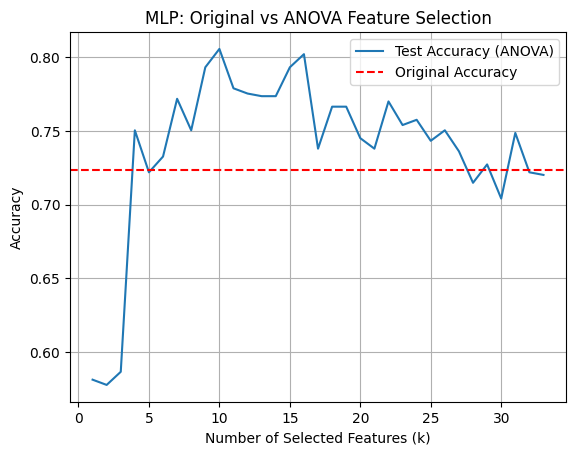

In [ ]:
optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)

anova_test_acc, anova_val_acc, anova_models, anova_selectors = anova_feature_selection(
    X_train_numeric, y_train_enc,
    X_val_numeric, y_val_enc,
    X_test_numeric, y_test_enc,
    optimizer=optimizer,
    n_of_hidden_layers=2
)

# Baseline accuracy (original model)
baseline_pred = mlp_model.predict(X_test_numeric)
baseline_pred_classes = np.argmax(baseline_pred, axis=1)
baseline_acc = accuracy_score(y_test_enc, baseline_pred_classes)
# Accuracy plot
plt.plot(range(1, len(anova_test_acc)+1), anova_test_acc, label='Test Accuracy (ANOVA)')
plt.xlabel("Number of Selected Features (k)")
plt.axhline(y=baseline_acc, color='red', linestyle='--', label='Original Accuracy')
plt.ylabel("Accuracy")
plt.title("MLP: Original vs ANOVA Feature Selection")
plt.legend()
plt.grid(True)
plt.show()


18/18 [==============================] - 0s 1ms/step

Classification Report:
              precision    recall  f1-score   support

   Blackhole       0.83      0.79      0.81       122
   Diversion       0.75      0.83      0.79        90
      Normal       1.00      1.00      1.00        49
    Overflow       1.00      0.12      0.21        17
    PortScan       0.91      0.64      0.75       127
     TCP-SYN       0.72      0.96      0.82       156

    accuracy                           0.81       561
   macro avg       0.87      0.72      0.73       561
weighted avg       0.83      0.81      0.80       561



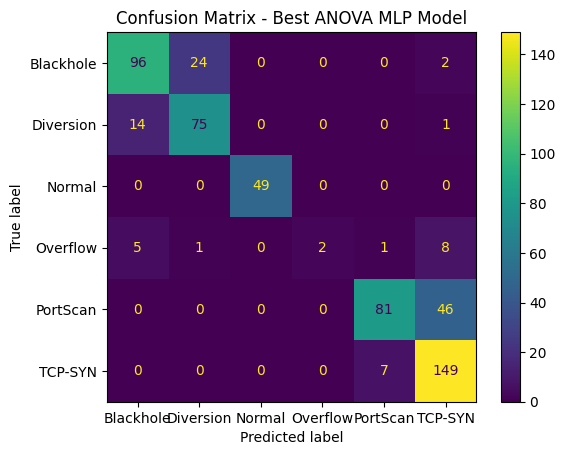

In [ ]:
from sklearn.metrics import classification_report, ConfusionMatrixDisplay

best_k_idx = np.argmax(anova_val_acc)
best_model = anova_models[best_k_idx]
best_selector = anova_selectors[best_k_idx]

X_test_best = best_selector.transform(X_test_numeric)
y_pred_best = best_model.predict(X_test_best)
y_pred_classes = np.argmax(y_pred_best, axis=1)


# Evaluation report
print("\nClassification Report:")
print(classification_report(y_test_enc, y_pred_classes, target_names=label_encoder.classes_))
ConfusionMatrixDisplay.from_predictions(y_test_enc, y_pred_classes, display_labels=label_encoder.classes_)
plt.title("Confusion Matrix - Best ANOVA MLP Model")
plt.grid(False)
plt.show()



